In [10]:
import pandas as pd
import numpy as np
import joblib  # To load the saved model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the trained model
model_path = 'rssi_prediction_model.pkl'
rssi_model = joblib.load(model_path)
print("Model loaded successfully!")

# Load the dataset for prediction (ensure you have preprocessed data similar to training)
data_path = 'data_preprocessed.csv'  # Path to the data file
data = pd.read_csv(data_path)

# Check if the columns are correct
input_features = data[['reference_point', 'bssid', 'channel', 'xr', 'yr', 'relative_position']]

# Preprocess the input features (apply scaling or any preprocessing done during training)
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaled_features = scaler.fit_transform(input_features)

# Predict RSSI values using the loaded model
predictions = rssi_model.predict(scaled_features)

# Assign predictions to their respective columns in the DataFrame
data['predicted_rssi_ap_digilab'] = predictions[:, 0]
data['predicted_rssi_ap_dosen'] = predictions[:, 1]

# Print the first few rows to verify predictions
print(data.head())

# Calculate error metrics
# Ensure y_test contains the actual labels (replace this with your actual test data)
y_test = data[['rssi_ap_digilab', 'rssi_ap_dosen']].values

# Calculate the metrics for each output
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print error metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# Optionally, save the predictions to a CSV file
output_path = 'predicted_rssi_results.csv'
data.to_csv(output_path, index=False)
print(f"Predicted RSSI values saved to {output_path}")


Model loaded successfully!
                                  time  reference_point  iteration  \
0  2024-10-17 08:38:31.952562400+00:00                1          3   
1  2024-10-17 08:39:38.608620600+00:00                1          1   
2  2024-10-17 08:39:45.832622300+00:00                1          1   
3  2024-10-17 08:40:03.157448400+00:00                1          2   
4  2024-10-17 08:40:08.170180900+00:00                1          2   

          ssid  bssid  channel   xr    yr  rssi_ap_digilab  rssi_ap_dosen  \
0  DTE Student      4       11  300  1368            -64.0         -200.0   
1    DTE Staff      3       11  300  1368            -63.0         -200.0   
2  DTE Student      4       11  300  1368            -63.0         -200.0   
3  DTE Student      4       11  300  1368            -64.0         -200.0   
4    DTE Staff      3       11  300  1368            -65.0         -200.0   

   relative_position     time_numeric  predicted_rssi_ap_digilab  \
0                  0 

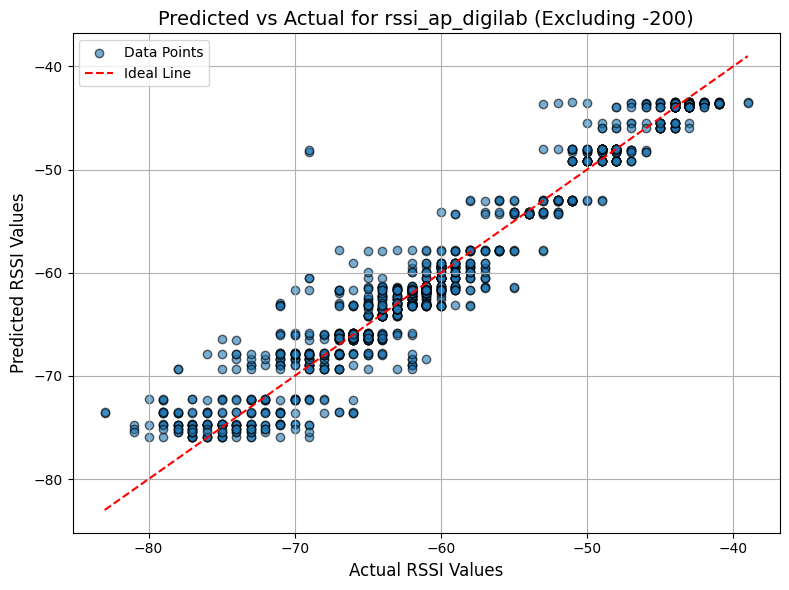

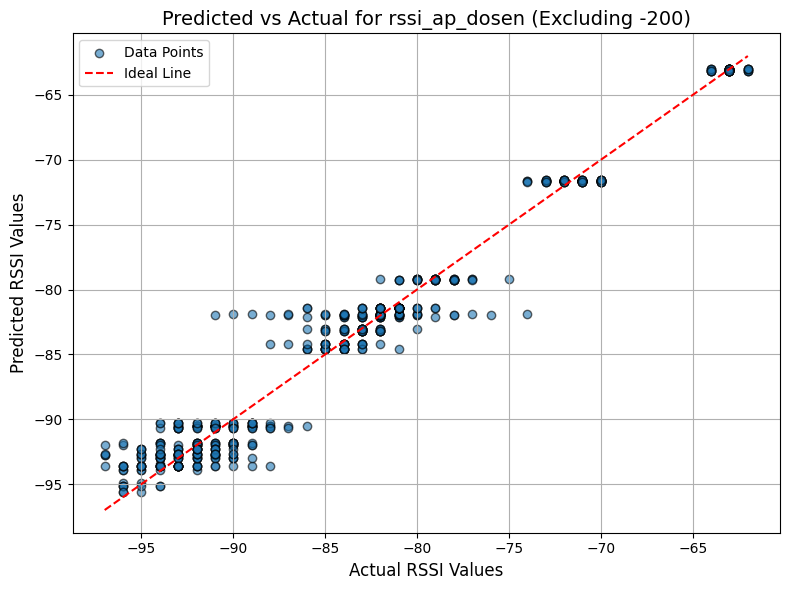

In [11]:
import matplotlib.pyplot as plt

# Extract actual RSSI values
actual_digilab = data['rssi_ap_digilab']
actual_dosen = data['rssi_ap_dosen']

# Extract predicted RSSI values
predicted_digilab = data['predicted_rssi_ap_digilab']
predicted_dosen = data['predicted_rssi_ap_dosen']

# List of tuples for looping through AP types
ap_types = [
    ("rssi_ap_digilab", actual_digilab, predicted_digilab),
    ("rssi_ap_dosen", actual_dosen, predicted_dosen)
]

# Generate scatter plots for each AP
for label, actual, predicted in ap_types:
    # Filter out invalid RSSI values (-200)
    mask = (actual != -200) & (predicted != -200)
    filtered_actual = actual[mask]
    filtered_predicted = predicted[mask]

    # Plot the scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(
        filtered_actual, 
        filtered_predicted, 
        alpha=0.6, 
        edgecolors='k', 
        label='Data Points'
    )
    plt.plot(
        [filtered_actual.min(), filtered_actual.max()],
        [filtered_actual.min(), filtered_actual.max()],
        color='red', linestyle='--', label='Ideal Line'
    )
    plt.title(f"Predicted vs Actual for {label} (Excluding -200)", fontsize=14)
    plt.xlabel("Actual RSSI Values", fontsize=12)
    plt.ylabel("Predicted RSSI Values", fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


NameError: name 'a' is not defined